<a href="https://colab.research.google.com/github/clausbaek/DateCountDownCalc/blob/main/custom7_(feature_extract).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

> Image captioning is the task of generating textual descriptions of a given image, requiring  techniques of computer vision and natural language processing.

It is a popular research area of Artificial Intelligence that deals with image understanding and a language description for that image. Generating well-formed sentences requires both syntactic and semantic understanding of the language. Being able to describe the content of an image using accurately formed sentences is a very challenging task, but it could also have a great impact, by helping visually impaired people better understand the content of images.  [source](https://www.analyticsvidhya.com/blog/2020/11/create-your-own-image-caption-generator-using-keras/) 

Here, I have used [COCO Dataset 2017](https://cocodataset.org/#download) which contains **12 different types of categories** and among them it has **80 types of sub-categories**. Each sub categories contain list of images and five captions to each image.

In [1]:
# (코드는 Xception + LSTM + Token(코코데이터셋 전체로 만든 토큰사용))

# 코드는 CTRL+F 로  멈춰 까지 돌리면됩니다.

In [19]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [20]:

# !wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip


In [22]:

from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)    
    except BadZipFile as e:
        print("Error:", e)
# extract_train_path = "./coco_train2017"
# # extract_val_path = "./coco_val2017"
# # extract_ann_path="./coco_ann2017"
# extract_zip_file(extract_train_path)
# extract_zip_file(extract_val_path)
# extract_zip_file(extract_ann_path)

In [23]:

import os
# total_path = "/content/coco_train2017/train2017" # all cocodataset
# total_train = os.listdir(total_path)



FileNotFoundError: ignored

In [24]:
print(len(total_train))

print(total_train[-1])

NameError: ignored

In [ ]:
import pickle 

with open("my_part.pkl", "rb") as f:
    load_part = pickle.load(f)

my_part_1, my_part_2, my_part_3 = load_part["C"]# 3개 리스트


In [4]:
print(my_part_1)

# for jpg_path in my_part_1:
#   if jpg_path in sample_train:


NameError: ignored

### 드라이브 마운트 & os확인

In [5]:
# # # 뒤에 숫자만 수정 (01~12)

# # # /content/drive/MyDrive/cocodataset/destination_folder/train_folder01
# sample_path = "/content/drive/MyDrive/destination_folder/train_folder01" # 10,000 cocodataset

# my_part = sample_path[-14:]






In [6]:


# 전체 파일 확인용

# sample_paths =[]
# for i in range(12):
#   # /content/drive/MyDrive/cocodataset/destination_folder/train_folder01
#   sample_path = "/content/drive/MyDrive/destination_folder/train_folder" # 10,000 cocodataset

#   # my_part = sample_path[-14:]
#   sample_paths.append("{}{:02d}".format(sample_path, i+1))



# for i, sample_path in enumerate(sample_paths):
#   path_len = len(os.listdir(sample_path))
#   print(path_len)
#   if path_len <8000:
#     print(i+1, path_len)
#     break

In [7]:
# import os

# sample_train = os.listdir(sample_path)

In [8]:
sample_train = my_part_1

NameError: ignored

In [9]:

print(len(sample_train), sample_train[:3])

NameError: ignored

In [25]:
 !pip install pycocotools

from pycocotools.coco import COCO # COCO python library
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import random
import string

import cv2
import os
from pickle import dump, load
import json

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Dropout, Attention
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

from keras.layers import add

from tensorflow.keras.models import Model, load_model

# small library for seeing the progress of loops.
from tqdm.notebook import tqdm

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:

# /content/drive/MyDrive/cocodataset/destination_folder/train_folder01
# /content/drive/MyDrive/coco_ann2017/annotations


# Exploring COCO Dataset

#### Initialize COCO class and operate instances_train2017.json

In [27]:
import pandas as pd
i = 0
with open(f'/content/drive/MyDrive/coco_dataset/coco_ann2017/annotations/captions_train2017.json', 'r') as f: # 마운트 확인
    data = json.load(f)
    data = data['annotations']

img_cap_pairs = []

for sample in data:
    img_name = '%012d.jpg' % sample['image_id']
    img_cap_pairs.append([img_name, sample['caption'],sample['image_id']])

captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption','image_id'])
captions['image'] = captions['image'].apply(
    lambda x: f'/content/drive/MyDrive/coco_dataset//train2017/{x}'
)
captions = captions.reset_index(drop=True)
print(captions.head())



                                               image  \
0  /content/drive/MyDrive/coco_dataset//train2017...   
1  /content/drive/MyDrive/coco_dataset//train2017...   
2  /content/drive/MyDrive/coco_dataset//train2017...   
3  /content/drive/MyDrive/coco_dataset//train2017...   
4  /content/drive/MyDrive/coco_dataset//train2017...   

                                             caption  image_id  
0  A bicycle replica with a clock as the front wh...    203564  
1  A room with blue walls and a white sink and door.    322141  
2  A car that seems to be parked illegally behind...     16977  
3  A large passenger airplane flying through the ...    106140  
4  There is a GOL plane taking off in a partly cl...    106140  


In [28]:

print(type(data))
print(data[0])
print(data[1])

print(len(captions))




<class 'list'>
{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
{'image_id': 322141, 'id': 49, 'caption': 'A room with blue walls and a white sink and door.'}
591753


In [29]:
captions2 = captions.groupby(["image", "image_id"])['caption'].apply(list).reset_index()


captions2.shape


(118287, 3)

In [30]:
captions2.head()

print(captions2.shape)


print(
captions2.iloc[0,0],
"\n",
captions2.iloc[0,1],
"\n",
captions2.iloc[0,2])



(118287, 3)
/content/drive/MyDrive/coco_dataset//train2017/000000000009.jpg 
 9 
 ['Closeup of bins of food that include broccoli and bread.', 'A meal is presented in brightly colored plastic trays.', 'there are containers filled with different kinds of foods', 'Colorful dishes holding meat, vegetables, fruit, and bread.', 'A bunch of trays that have different food.']


In [31]:
mypath_dict = {row['image']: row['caption'] for _, row in captions2.iterrows()}

# Or, use the 'image_id' column as the key
myid_dict = {row['image_id']: row['caption'] for _, row in captions2.iterrows()}

In [32]:
print(len(mypath_dict), len(myid_dict))



118287 118287


In [33]:

myid_dict[9]

['Closeup of bins of food that include broccoli and bread.',
 'A meal is presented in brightly colored plastic trays.',
 'there are containers filled with different kinds of foods',
 'Colorful dishes holding meat, vegetables, fruit, and bread.',
 'A bunch of trays that have different food.']

In [34]:
##### 전체 dict pickle 로 만들필요는 없음


import tensorflow as tf

# Assuming 'myid_dict' is your dictionary with image_id or image as the key and the list of captions as the value

VOCABULARY_SIZE = 15000
MAX_LENGTH = 51

# Create a new TextVectorization layer
new_tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=VOCABULARY_SIZE,
    standardize=None,
    output_sequence_length=MAX_LENGTH)



In [35]:
# Extract all captions from the dictionary
all_captions = [caption for captions_list in tqdm(myid_dict.values(), desc="Extracting captions") for caption in captions_list]


Extracting captions:   0%|          | 0/118287 [00:00<?, ?it/s]

In [36]:
# 돌릴필요는 없음

# # Adapt the tokenizer to the captions
# new_tokenizer.adapt(all_captions)

# # 약 1분넘게걸림

In [37]:

# # 전체 tokenizer 저장 돌릴 필요없음 지우지는 말것.


# # Assuming 'new_tokenizer' is your adapted TextVectorization layer

# # Check the vocabulary size
# vocab_size = new_tokenizer.vocabulary_size()
# print(f"Vocabulary size: {vocab_size}")

# # Get the vocabulary as a list
# vocabulary = new_tokenizer.get_vocabulary()
# print(f"Sample vocabulary words: {vocabulary[:10]}")

# # Test the new_tokenizer on a sample caption
# sample_caption = "what if my sentence is that long"
# tokenized_caption = new_tokenizer([sample_caption]).numpy()
# print(f"Tokenized sample caption: {tokenized_caption}")

In [38]:
# # 전체 tokenizer 저장 돌릴 필요없음 지우지는 말것.

# import pickle

# # Get the tokenizer's configuration and weights
# tokenizer_config = new_tokenizer.get_config()
# tokenizer_weights = new_tokenizer.get_weights()

# # Save the configuration and weights to a file
# with open("my_tokenizer.pkl", "wb") as f:
#     pickle.dump({"config": tokenizer_config, "weights": tokenizer_weights}, f)

In [39]:

sample_path =total_path # 여기서는 sample_path가아니라 전체코코데이터에서 가져옴

my_sample_path = []
my_image_id= []

for jpg_file in sample_train:
    my_sample_path.append(sample_path+"/" +jpg_file)


    # exctract id in sample
    image_id = int(jpg_file.split('.')[0])
    my_image_id.append(image_id)

print(my_sample_path[:2],"\n", len(my_sample_path))
print()
print(my_image_id[:3], len(my_image_id))


# 이제 내 만개짜리 샘플 데이터 를 dict 형태로 



NameError: ignored

In [ ]:
# Function to check if the image ID is in the my_image_id list
def keep_id(image_id):
    return image_id in my_image_id

# Create a custom dictionary with only the partial image IDs
my_custom_train_set = {k: v for k, v in myid_dict.items() if keep_id(k)}

In [ ]:


# captions (json 으로 만든), id는 11만개

# 폴더에 실제로 내가 지금 가져온 id는 만개

# 위 코드를 통해서 내 아이디를 위에 caption 

# 즉 내 폴더에있는 아이디만 가지고 dict 를 만듬

In [ ]:
# 내 키 갯수

len(my_custom_train_set.keys())


In [ ]:
updated_dict = {}
for k, v in my_custom_train_set.items():
    new_key = sample_path+"/{:012d}.jpg".format(k)
    updated_dict[new_key] = v


In [ ]:
len(updated_dict)

#### Load some of the random images

In [ ]:
imgIdss= list(updated_dict.keys())
import random
random.shuffle(imgIdss)


In [ ]:
# 랜덤 파일 읽기
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = imgIdss
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    I = io.imread(img_path)
    plt.imshow(I)
    print( updated_dict[img_path][0])

plt.show()

In [ ]:
print("Total images for training: ", len(imgIdss))

# Prepare Dataset 

#### Group all captions together having the same image and store them in dict.

In [ ]:
# dataset = dict()
# imgcaptions = []

# for imgid in imgIdss:
#     img = coco.loadImgs(imgid)[0]
#     annIds = coco_caps.getAnnIds(imgIds=img['id']);
#     anns = coco_caps.loadAnns(annIds)
#     imgcaptions = []
#     for cap in anns:
        
#         # Remove punctuation
#         cap = cap['caption'].translate(str.maketrans('', '', string.punctuation))
        
#         # Replace - to blank
#         cap = cap.replace("-"," ")
        
#         # Split string into word list and Convert each word into lower case
#         cap = cap.split()
#         cap = [word.lower() for word in cap]
        
#         # join word list into sentence and <start> and <end> tag to each sentence which helps 
#         # LSTM encoder-decoder model while training.
        
#         cap = '<start> ' + " ".join(cap) + ' <end>'
#         imgcaptions.append(cap)
        
#     dataset[img['coco_url']] = imgcaptions 
    
# print("Length of Dataset: ",len(dataset))
# # print(dataset['http://images.cocodataset.org/train2017/000000047084.jpg'])
# #dataset

# print("type of Dataset: " ,type(dataset))



In [ ]:
dataset =updated_dict

In [ ]:
import itertools


# 임시 : sample은 개수

SAMPLE_NUM=10
testsample_dict= dict(itertools.islice(dataset.items(), SAMPLE_NUM))


# sample 쓴다고 가정
dataset = testsample_dict

# Preprocess and tokenize the captions

In [ ]:
from itertools import chain

def tokenize_mycaption(dataset, total_words=0):
  
  flatten_list = list(chain.from_iterable(dataset.values())) #[[1,3],[4,8]] = [1,3,4,8]

  tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
  tokenizer.fit_on_texts(flatten_list)
  total_words = len(tokenizer.word_index) + 1

  print("Vocabulary length: ", total_words)
  # print("Bicycle ID: ", tokenizer.word_index['bicycle'])
  # print("Airplane ID: ", tokenizer.word_index['airplane'])
  print(list(tokenizer.word_index.keys())[:10])
  return tokenizer, total_words

tokenizer, total_words= tokenize_mycaption(dataset)

In [ ]:

tokenizer, total_words

In [ ]:

# import csv
# with open('/content/drive/MyDrive/3조/donut_token', 'r') as f:
#     csv_reader = csv.reader(f)
#     for line in csv_reader:
#      flatten_list =  line

# with open('/content/drive/MyDrive/3조/dataset', 'r') as f2:
#     csv_reader = csv.reader(f2)
#     for line in csv_reader:
#      dataset =  dataset


# # tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
# # tokenizer.fit_on_texts(flatten_list)
# # total_words = len(tokenizer.word_index) + 1

# tokenizer, total_words= tokenize_mycaption(dataset)
# print("sample:")
# sample_tokenizer , sample_total_words = tokenize_mycaption(testsample_dict)


In [ ]:
print(total_words)
print(tokenizer.word_index)


In [ ]:
# 해당 만개 데이터에 대한 tokenizer 저장 (할필요가 있는지는 모르겠음)

import pickle

# Save the configuration and weights to a file
with open(f"my_tokenizer_{my_part}.pkl", "wb") as f:
    pickle.dump({"tokenizer": tokenizer}, f)




In [ ]:
dataset_list = list(dataset)


sample_link = dataset_list[0]


sample_captions = dataset[sample_link]


sample_link, sample_captions

In [ ]:
# def process_an_image(img, imsize = (299,299)):

#     # io.imread -> image "img 파일은 http 주소 형태" #
 
#     for img in tqdm(dataset.keys()):
#         image = io.imread(img)
#         if image.ndim != 3:
#             image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    
#         # Resize each image size 299 x 299
#         image = cv2.resize(image,imsize)
#         image = np.expand_dims(image, axis=0)
    
#         # Normalize image pixels
#         image = image/127.5
#         image = image - 1.0
#     return image

# test_img = process_an_image(dataset)

# test_img.shape

# Preprocess and caching the features extracted from InceptionV3

I will use InceptionV3 (which is pretrained on Imagenet) to classify each image. I will extract features from the last convolutional layer. This is also called a tranfer learning.

Since the Xception model was originally built for **imagenet**, we will do little changes for integrating with our model. Here, the Xception model takes **100 x 100 x 3** image size as input. We will remove the last classification layer and get the **2048 feature vector**.

In [ ]:

# from tensorflow.keras.layers import GlobalAveragePooling1D

# def CNN_Encoder(): # Inception
#     inception_v3 = tf.keras.applications.InceptionV3(
#         include_top=False,
#         weights='imagenet'
#     )

#     output = inception_v3.output
#     print("output1\n", output,"\n------------------------------------------------------------")
#     # inception_v3.output , 즉    (None, 2048) 

#     output = tf.keras.layers.Reshape(
#         (-1, output.shape[-1]))(output)
#     # output after reshape

#     print("output2\n", output,"\n------------------------------------------------------------")

#     output = GlobalAveragePooling1D()(output)

#     cnn_model = tf.keras.models.Model(inception_v3.input, output)
#     return cnn_model, output



In [ ]:
# model_incep = CNN_Encoder()[0]

# test_features = model_incep(test_img)


# test_features.shape



In [45]:
# model_incep.summary()
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:


model = Xception(include_top=False, pooling='avg',  weights='imagenet')
# model.compile()
image_features = {}

imsize = (299,299)
# dataset.keys()
error_imgs = []
def img_preprocess(dataset=dataset,imsize=imsize, model=model):
    for img in tqdm(list(dataset.keys())):
        try:
            image = io.imread(img)
            if image.ndim != 3:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

            # Resize each image size 299 x 299
            image = cv2.resize(image, (imsize[1], imsize[0]))
            image = np.expand_dims(image, axis=0)

            # Normalize image pixels
            image = image / 127.5
            image = image - 1.0

            # Extract features from image
            feature = model.predict(image)
            image_features[img] = feature

        except:
            print(f"Failed to process image {img}")
            error_imgs.append[img]


img_preprocess(dataset)


In [44]:
IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False


# img_preprocess(dataset, imsize =IMAGE_SHAPE, model = mobilenet)



x = mobilenet.output
x = GlobalAveragePooling2D()(x)

modified_mobilenet = Model(inputs=mobilenet.input, outputs=x)


# modified_mobilenet.summary()

img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_mobilenet)
# 뒤에 각모델마다  호출할때 모델 피팅 따로적용해야함

4334752/4334752 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                             

In [43]:




IMAGE_SHAPE=(224, 224, 3)

vgg16 = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
) 
vgg16.trainable=False

x = vgg16.output
x = GlobalAveragePooling2D()(x)

modified_vgg16 = Model(inputs=vgg16.input, outputs=x)


# modified_vgg16.summary()

img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_vgg16)
# 뒤에 각모델마다  호출할때 모델 피팅 따로적용해야함

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:

print("Image features length: ", len(image_features))


Image features length:  0


In [ ]:

# Get the tokenizer's configuration and weights
# image_features

# 각자 Sampletrain 별로 저장하기 
# ex) train

with open(f"my_feature_{len(image_features)}_{my_part}.pkl", "wb") as f:
    pickle.dump({"feature": image_features}, f)

In [ ]:
# model = Xception(include_top=False, pooling='avg',  weights='imagenet')
# model.summary()

In [ ]:
# mykeys = list(image_features.keys())
# my_key = mykeys[0]
# image_features[my_key].shape

In [ ]:

# from keras.utils import plot_model

# model.summary()

# plot_model(model, to_file='model.png')


Here, I have found the max_length among the captions which will help to pad each caption with the same length.

In [ ]:
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    
max_length = max_length(dataset)
max_length

49

# Make a Data Generator

We have to train our model on 6221 images and each image will contain 2048 length feature vector and caption is also represented as numbers. This amount of data for 6221 images is not possible to hold into memory so we will be using a generator method that will yield batches.

**The generator will yield the input and output sequence.**

##### For example:

The input to our model is [x1, x2] and the output will be y, where x1 is the 2048 feature vector of that image, x2 is the input text sequence and y is the output text sequence that the model has to predict.

![Capture.PNG](attachment:abfdd0f4-ece1-4fe8-a9db-4060a31f10fd.PNG)

In [ ]:
#create input-output sequence pairs from the image description.

def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():

            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image, input_sequence], output_word)
            

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    
    # walk through each description for the image
    for desc in desc_list:
        
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=total_words)[0]
            
            # store
            X1.append(feature) # image features
            X2.append(in_seq)  # Caption input
            y.append(out_seq)  # Caption output
            
    return np.array(X1), np.array(X2), np.array(y)


In [ ]:
# 멈춰!!

#**여기까지만 돌리기 (Feature), 뒤는 하고싶다면,  디버그해야함**

#**여기까지만 돌리기 (Feature), 뒤는 하고싶다면,  디버그해야함**

#**여기까지만 돌리기 (Feature), 뒤는 하고싶다면,  디버그해야함**

# Define CNN-LSTM Model

#### CNN (Convolution Neural Network)

Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1.


#### [Click here](https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/) to know more about CNN.

<br>

#### LSTM (Long short-term memory)


Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning


#### [Click here](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/) to know more about LSTM.


# Model Architechture 

### CNN-LSTM model:

- CNN is used for extracting features from the image. We will use the pre-trained model Xception.
- LSTM will use the information from CNN to help generate a description of the image.


### Model structure

![model.png](attachment:5e082228-cfa2-49fe-9526-fd31a45a9868.png)


* The feature extracted from the image has a size of 2048, with a dense layer, we will reduce the dimensions to 256 nodes.<br> 
* An embedding layer will handle the text input,followed by the LSTM layer.
<br>
* Then By merging the output from the above two layers, we will process by the dense layer to make the final prediction. The final layer will contain the number of nodes equal to our vocabulary size.

In [ ]:
from tensorflow.keras.utils import plot_model

# define the captioning model
def define_model(total_words, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(total_words, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(total_words, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model


# # define the captioning model
# def define_model2(total_words, max_length):

#     # features from the CNN model squeezed from 2048 to 256 nodes

#     # inputs1 = Input(shape=(2048,))

#     # remove code below 

#     # cnnmodel = CNN_Encoder()
#     inputs1 =  CNN_Encoder()[1]

#     fe1 = Dropout(0.5)(inputs1)
#     fe2 = Dense(256, activation='relu')(fe1)

#     # LSTM sequence model
#     inputs2 = Input(shape=(max_length,))
#     se1 = Embedding(total_words, 256, mask_zero=True)(inputs2)
#     se2 = Dropout(0.5)(se1)
#     se3 = LSTM(256)(se2)

#     # Merging both models
#     decoder1 = add([fe2, se3])
#     decoder2 = Dense(256, activation='relu')(decoder1)
#     outputs = Dense(total_words, activation='softmax')(decoder2)

#     # tie it together [image, seq] [word]
#     model = Model(inputs=[inputs1, inputs2], outputs=outputs)
#     model.compile(loss='categorical_crossentropy', optimizer='adam')

#     # summarize model
#     print(model.summary())
#     plot_model(model, to_file='model.png', show_shapes=True)

#     return model


In [ ]:
# train our model
import os

os.mkdir("models")

# testsample_dict
model = define_model(total_words, max_length)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 49)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 49, 256)      2502144     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                              

In [ ]:
# model2 = define_model2(total_words, max_length)


In [ ]:
# def process_an_image(img, imsize = (299,299)):

#   # io.imread -> image "img 파일은 http 주소 형태" #
#   # 

# # for img in tqdm(dataset.keys()):
#     image = io.imread(img)
#     if image.ndim != 3:
#         image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    
#     # Resize each image size 299 x 299
#     image = cv2.resize(image,imsize)
#     image = np.expand_dims(image, axis=0)
    
#     # Normalize image pixels
#     image = image/127.5
#     image = image - 1.0
#     return image
#     # # Extract features from image
#     # feature = model.predict(image)
#     # image_features[img] = feature


In [ ]:

# # shape = [(None,2048),(None,51)]

# # model = Model(inputs=[inputs1, inputs2], outputs=outputs) # img, seq, 

# # inputs1=  train_inputs ???

# for img_links in tqdm(list(dataset.keys())[:10]) : 
#   process_an_image(img_links)


# # inputs2 = seq_inputs ?? 어떻게 수정


# # inputs1, inputs2 관계?


# # input_data =

# # model2.fit(input_data,epochs=1, steps_per_epoch= steps, verbose=1)

In [ ]:
# # an_image = process_an_image("http://images.cocodataset.org/train2017/000000156510.jpg")


# a_key = list(dataset.keys())[0]
# img_location= a_key
# captions = dataset[a_key]
# print(img_location,"\n", captions)


# imgdata = process_an_image(a_key)

# print(imgdata.shape)

# plt.imshow(imgdata[0])


In [ ]:
# def create_sequences2(tokenizer, max_length, desc_list):
#   X2, y = list(), list()
    
#     # walk through each description for the image
#   for desc in desc_list:
        
#         # encode the sequence
#     seq = tokenizer.texts_to_sequences([desc])[0]

#     # split one sequence into multiple X,y pairs
#     for i in range(1, len(seq)):

#       # split into input and output pair
#       in_seq, out_seq = seq[:i], seq[i]

#       # pad input sequence
#       in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

#       # encode output sequence
#       out_seq = to_categorical([out_seq], num_classes=total_words)[0]

#       # store

#       X2.append(in_seq)  # Caption input
#       y.append(out_seq)  # Caption output

#   return  np.array(X2), np.array(y)


# create_sequences2(tokenizer, max_length, captions)


In [ ]:

# def data_generator2(descriptions, tokenizer, max_length):
#   while 1:
#     for key, description_list in descriptions.items():
#       print(key,description_list)
#       input_image = process_an_image(key)
#       input_sequence, output_word = create_sequences2(tokenizer, max_length, description_list)
#       print(input_image.shape, input_sequence.shape, output_word.shape)
#     yield ([input_image, input_sequence], output_word)

# gen2 = data_generator2(dataset, tokenizer, max_length)

In [ ]:
# for i in gen2:
#   i

In [ ]:
# generator = data_generator(dataset, image_features, tokenizer, max_length)

# for i in generator:
#   i


In [ ]:

def train_our_model(dataset):


  print('Dataset: ', len(dataset))
  print('Descriptions: train=', len(dataset))
  print('Photos: train=', len(image_features))
  print('Vocabulary Size:', total_words)
  print('Description Length: ', max_length)

  epochs=2
  steps = len(dataset)

  # making a directory models to save our models

  
  for i in range(epochs):
      generator = data_generator(dataset, image_features, tokenizer, max_length)
      model.fit(generator, epochs=1, steps_per_epoch= steps, verbose=1)
      model.save("models/model_" + str(i) + ".h5")


In [ ]:
train_our_model(dataset)

Dataset:  10000
Descriptions: train= 10000
Photos: train= 10000
Vocabulary Size: 9774
Description Length:  49
10000/10000 [==============================] - 1690s 169ms/step - loss: 3.4278


In [ ]:

# def train_our_model1(dataset,model = model1, tokenizer= tokenizer,max_length=max_length):


#   print('Dataset: ', len(dataset))
#   print('Descriptions: train=', len(dataset))
#   print('Photos: train=', len(image_features))
#   print('Vocabulary Size:', total_words)
#   print('Description Length: ', max_length)

#   epochs=2
#   steps = len(dataset)

#   # making a directory models to save our models

  
#   for i in range(epochs):
#       generator = data_generator(dataset, image_features, tokenizer, max_length)
#       model.fit(generator, epochs=1, steps_per_epoch= steps, verbose=1)
#       model.save("models/model_" + str(i) + ".h5")


In [ ]:
# train_our_model1(testsample_dict)

In [ ]:

# def train_our_model2(dataset,model = model):


#   print('Dataset: ', len(dataset))
#   print('Descriptions: train=', len(dataset))
#   # print('Photos: train=', len(image_features))
#   print('Vocabulary Size:', total_words)
#   print('Description Length: ', max_length)

#   epochs=1
#   steps = len(dataset)

#   # making a directory models to save our models

  
#   for i in range(epochs):
#       print(i)
#       gen2 = data_generator2(dataset, tokenizer, max_length)
#       print(1)

#       model.fit(gen2, epochs=1, steps_per_epoch= steps, verbose=1)
#       model.save("models/model_" + str(i) + ".h5")


In [ ]:
# train_our_model2(testsample_dict,model2)

In [ ]:
# train_our_model2(testsample_dict,model2)




In [ ]:
# model2.summary()

In [ ]:
# model1.name

In [ ]:
# model1.save("models/model1_f.h5")

In [ ]:
# # model_incep_lstm


# # os.mkdir(models)


  
# train_our_model(testsample_dict, model2)
# model2.name
# model2.save("models/model2_f.h5")

In [ ]:

# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# import glob
# img_paths = []
# for filename in glob.glob('./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/*.jpg'): #assuming jpg
#     # im=Image.open(filename)
#     # print(filename)
#     # print(im)
#     img_paths.append(filename)

#     if len(img_paths)>10:
#       break
# print(img_paths)


In [ ]:

def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        
        if word is None:
            break
        in_text += ' ' + word
        
        if word == 'end':
            break
    return in_text


    


In [ ]:

# xception_model = Xception(include_top=False, pooling="avg")




In [ ]:
# print(max_length)
# print(model1.name)

# from keras.utils import plot_model
# plot_model(model1, to_file='model.png')


In [ ]:
# print(max_length)
# print(model2.name)

# from keras.utils import plot_model
# plot_model(model2, to_file='model.png')


In [ ]:
# photo = extract_features(img_paths[0], xception_model)
# img = Image.open(img_paths[0])
# description = generate_desc(model1, tokenizer, photo, max_length)
# print("\n\n")
# print(description)
# plt.imshow(img)

In [ ]:
# copy_model2 = load_model('./drive/MyDrive/3조/best_model.h5')
# copy_ssd = load_model('/content/drive/MyDrive/3조/ssd300.h5')

# copy_model2.summary()
# copy_ssd.summary()


In [ ]:
# plot_model(copy_ssd, to_file='model0.png')


In [ ]:
# plot_model(copy_model2, to_file='model1.png')


In [ ]:
# max_length =42
# generator = data_generator(dataset, image_features, tokenizer, max_length)


In [ ]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
img_paths = []
for filename in glob.glob('./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/*.jpg'): #assuming jpg
    # im=Image.open(filename)
    # print(filename)
    # print(im)
    img_paths.append(filename)

    if len(img_paths)>10:
      break



print(img_paths)



['./drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000571635.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000202658.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000203564.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000410627.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000208408.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000581177.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000153184.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_train2017_000000027842.jpg', './drive/MyDrive/3조/sample_train_coco (1)/sample_train_coco/_content_coco_train2017_tr

In [ ]:
len(img_paths)

11

1/1 [==============================] - 1s 906ms/step



start in a bathroom with a sink and a sink and a sink in the mirror of the bathroom sink and a bathroom sink and a sink in the mirror of the bathroom sink and a bathroom sink and a toilet in the bathroom with a sink and a sink
1/1 [==============================] - 0s 26ms/step



start a bathroom with a toilet and a toilet and a toilet and a toilet and a toilet and a toilet and a toilet in the background of it in the middle of the corner of the wall in the middle of the room with a toilet and a toilet
1/1 [==============================] - 0s 25ms/step



start a large fire hydrant with a clock on it on the side of the road with a clock on it on the side of the road with a clock on it on the side of the street with a clock on it on the side of the road with
1/1 [==============================] - 0s 24ms/step



start of a man in a kitchen with a knife and a knife on it on a table with a knife and a knife on it on a table with a k

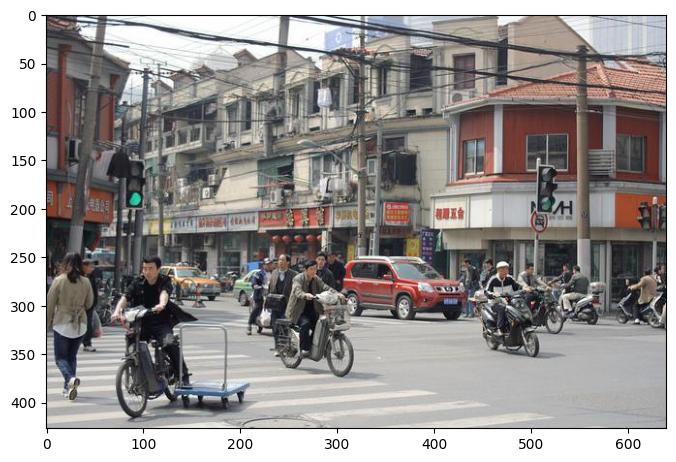

In [ ]:


xception_model = Xception(include_top=False, pooling="avg")
for image in img_paths:
  photo = extract_features(image,xception_model )
  img = Image.open(image)
  description = generate_desc(model, tokenizer, photo, 49)
  print("\n\n")
  print(description)
  plt.imshow(img)

In [ ]:

# photo = extract_features(img_paths[1], copy_ssd)
# img = Image.open(img_paths[1])
# description = generate_desc(copy_model2, tokenizer, photo, 42)
# print("\n\n")
# print(description)
# plt.imshow(img)

In [ ]:
# import tensorflow as tf
# import numpy as np
# import json
# from tqdm import tqdm
# from sklearn.utils import shuffle 

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, BatchNormalization
# from tensorflow.keras.layers import GlobalAveragePooling2D, Concatenate
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.layers import RepeatVector



# def build_cnn_lstm(vocab_size, max_length, embedding_dim=256, units=256):
#     # CNN Encoder (InceptionV3 pre-trained model)
#     inception = InceptionV3(include_top=False, weights='imagenet', pooling='avg')
#     for layer in inception.layers:
#         layer.trainable = False

#     input_image = Input(shape=(299, 299, 3))
#     encoded_image = inception(input_image)
#     encoded_image = Dense(embedding_dim, activation='relu')(encoded_image)
#     encoded_image = Dropout(0.5)(encoded_image)
#     encoded_image = BatchNormalization()(encoded_image)
#     encoded_image = RepeatVector(max_length)(encoded_image)

#     # LSTM Decoder
#     input_caption = Input(shape=(max_length,))
#     embedding = Embedding(vocab_size, embedding_dim)(input_caption)
#     lstm_layer = LSTM(units, return_sequences=True)(embedding)
#     lstm_layer = Dropout(0.5)(lstm_layer)
#     lstm_layer = BatchNormalization()(lstm_layer)
    
#     # Merge CNN and LSTM layers
#     merged = Concatenate()([encoded_image, lstm_layer])

#     # Dense layers
#     decoder = LSTM(units, return_sequences=True)(merged)
#     decoder = Dropout(0.5)(decoder)
#     decoder = BatchNormalization()(decoder)
#     decoder = LSTM(units, return_sequences=False)(decoder)
#     decoder = Dropout(0.5)(decoder)
#     decoder = BatchNormalization()(decoder)
#     output_caption = Dense(vocab_size, activation='softmax')(decoder)

#     # Define the model
#     model = Model(inputs=[input_image, input_caption], outputs=output_caption)

#     return model
# vocab_size = total_words  # Size of your vocabulary (adjust according to your dataset)
# max_length = max_length  # Maximum length of a caption (adjust according to your dataset)
# embedding_dim = 256  # Dimension of the word embeddings
# units = 256  # Number of LSTM units

# model = build_cnn_lstm(vocab_size, max_length, embedding_dim, units)
# model.summary()

In [ ]:
def data_generator(images, captions, tokenizer, max_length, batch_size=10):
    X1, X2, y = [], [], []
    n = 0
    while True:
        for img_path, img_captions in zip(images, captions):
            for caption in img_captions:
                n += 1

                # Preprocess image
                img = process_an_image(img_path)

                # Preprocess caption
                seq = tokenizer.texts_to_sequences([caption])[0]
                seq = pad_sequences([seq], maxlen=max_length, padding='post', truncating='post')[0]

                # Prepare input-output pairs
                for j in range(1, len(seq)):
                    in_seq, out_seq = seq[:j], seq[j]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(img)
                    X2.append(in_seq)
                    y.append(out_seq)

                if n == batch_size:
                    print(f"X1 shape: {np.array(X1).shape}, X2 shape: {np.array(X2).shape}, y shape: {np.array(y).shape}")
                    yield ([np.array(X1, dtype=object), np.array(X2, dtype=object)], np.array(y, dtype=object))
                    X1, X2, y = [], [], []
                    n = 0




In [ ]:
# data_gen = data_generator(list(testsample_dict.keys()), list(testsample_dict.values()), tokenizer=sample_tokenizer, max_length=max_length)
# iter = 0
# for i in tqdm(data_gen, total=10):
#     iter += 1
#     if iter > 10:
#         break

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-85-b22846ed2b04>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(f"X1 shape: {np.array(X1).shape}, X2 shape: {np.array(X2).shape}, y shape: {np.array(y).shape}")


X1 shape: (500, 1, 299, 299, 3), X2 shape: (500,), y shape: (500, 6429)


 10%|█         | 1/10 [00:19<02:51, 19.01s/it]

In [ ]:
# data_gen = data_generator( list(testsample_dict.keys()),  list(testsample_dict.values()) ,tokenizer=sample_tokenizer,max_length=max_length)
# iter = 0
# for i in tqdm(data_gen):
#   iter +=1
#   if len(i >10:
#     break

0it [00:00, ?it/s]

0
1 1 1
2 2 2
3 3 3
4 4 4
5 5 5
6 6 6
7 7 7
8 8 8
9 9 9
10 10 10
11 11 11
12 12 12
13 13 13
14 14 14
15 15 15
16 16 16
17 17 17
18 18 18
19 19 19
20 20 20
21 21 21
22 22 22
23 23 23
24 24 24
25 25 25
26 26 26
27 27 27
28 28 28
29 29 29
30 30 30
31 31 31
32 32 32
33 33 33
34 34 34
35 35 35
36 36 36
37 37 37
38 38 38
39 39 39
40 40 40
41 41 41
42 42 42
43 43 43
44 44 44
45 45 45
46 46 46
47 47 47
48 48 48
49 49 49
50 50 50
1
51 51 51
52 52 52
53 53 53
54 54 54
55 55 55
56 56 56
57 57 57
58 58 58
59 59 59
60 60 60
61 61 61
62 62 62
63 63 63
64 64 64
65 65 65
66 66 66
67 67 67
68 68 68
69 69 69
70 70 70
71 71 71
72 72 72
73 73 73
74 74 74
75 75 75
76 76 76
77 77 77
78 78 78
79 79 79
80 80 80
81 81 81
82 82 82
83 83 83
84 84 84
85 85 85
86 86 86
87 87 87
88 88 88
89 89 89
90 90 90
91 91 91
92 92 92
93 93 93
94 94 94
95 95 95
96 96 96
97 97 97
98 98 98
99 99 99
100 100 100
2
101 101 101
102 102 102
103 103 103
104 104 104
105 105 105
106 106 106
107 107 107
108 108 108
109 109 109
110 110 11

1it [00:23, 23.92s/it]

0
1 1 1
2 2 2
3 3 3
4 4 4
5 5 5
6 6 6
7 7 7
8 8 8
9 9 9
10 10 10
11 11 11
12 12 12
13 13 13
14 14 14
15 15 15
16 16 16
17 17 17
18 18 18
19 19 19
20 20 20
21 21 21
22 22 22
23 23 23
24 24 24
25 25 25
26 26 26
27 27 27
28 28 28
29 29 29
30 30 30
31 31 31
32 32 32
33 33 33
34 34 34
35 35 35
36 36 36
37 37 37
38 38 38
39 39 39
40 40 40
41 41 41
42 42 42
43 43 43
44 44 44
45 45 45
46 46 46
47 47 47
48 48 48
49 49 49
50 50 50
1
51 51 51
52 52 52
53 53 53
54 54 54
55 55 55
56 56 56
57 57 57
58 58 58
59 59 59
60 60 60
61 61 61
62 62 62
63 63 63
64 64 64
65 65 65
66 66 66
67 67 67
68 68 68
69 69 69
70 70 70
71 71 71
72 72 72
73 73 73
74 74 74
75 75 75
76 76 76
77 77 77
78 78 78
79 79 79
80 80 80
81 81 81
82 82 82
83 83 83
84 84 84
85 85 85
86 86 86
87 87 87
88 88 88
89 89 89
90 90 90
91 91 91
92 92 92
93 93 93
94 94 94
95 95 95
96 96 96
97 97 97
98 98 98
99 99 99
100 100 100
2
101 101 101
102 102 102
103 103 103
104 104 104
105 105 105
106 106 106
107 107 107
108 108 108
109 109 109
110 110 11

In [ ]:
train_images = list(testsample_dict.keys())

train_captions = list(testsample_dict.values())

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Set parameters
epochs = 2
batch_size = 10
steps_per_epoch = len(train_images) // batch_size

# Train the model
for i in tqdm(range(epochs)):
    generator = data_generator(train_images, train_captions, tokenizer, max_length)
    model.fit(generator, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)
    model.save('model_' + str(i) + '.h5')